<a href="https://colab.research.google.com/github/siddheshpednekar/dlpracts/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr

In [ ]:
df=pdr.DataReader('AAPL','yahoo')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-18,39.875000,39.180000,39.465000,39.375000,109712400.0,37.369446
2017-08-21,39.472500,38.777500,39.375000,39.302502,105474000.0,37.300640
2017-08-22,40.000000,39.505001,39.557499,39.945000,86418400.0,37.910412
2017-08-23,40.117500,39.720001,39.767502,39.994999,77596400.0,37.957867
2017-08-24,40.185001,39.637501,40.107498,39.817501,79275600.0,37.789410
...,...,...,...,...,...,...
2022-08-10,169.339996,166.899994,167.679993,169.240005,70170500.0,169.240005
2022-08-11,170.990005,168.190002,170.059998,168.490005,57149200.0,168.490005
2022-08-12,172.169998,169.399994,169.820007,172.100006,67946400.0,172.100006


In [ ]:
pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-18,39.875000,39.180000,39.465000,39.375000,109712400.0,37.369446
2017-08-21,39.472500,38.777500,39.375000,39.302502,105474000.0,37.300640
2017-08-22,40.000000,39.505001,39.557499,39.945000,86418400.0,37.910412
2017-08-23,40.117500,39.720001,39.767502,39.994999,77596400.0,37.957867
2017-08-24,40.185001,39.637501,40.107498,39.817501,79275600.0,37.789410


In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-10,169.339996,166.899994,167.679993,169.240005,70170500.0,169.240005
2022-08-11,170.990005,168.190002,170.059998,168.490005,57149200.0,168.490005
2022-08-12,172.169998,169.399994,169.820007,172.100006,67946400.0,172.100006
2022-08-15,173.389999,171.350006,171.520004,173.190002,54091700.0,173.190002
2022-08-16,173.710007,171.660004,172.779999,173.029999,56180100.0,173.029999


In [ ]:
df1=df.reset_index()['Close']
df1

0        39.375000
1        39.302502
2        39.945000
3        39.994999
4        39.817501
           ...    
1252    169.240005
1253    168.490005
1254    172.100006
1255    173.190002
1256    173.029999
Name: Close, Length: 1257, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

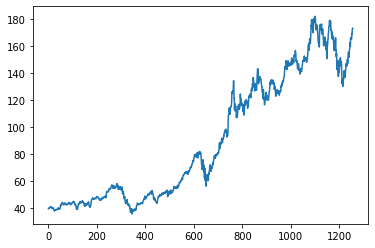

In [ ]:
plt.plot(df1)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(0,1))
df1=Scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.02613297],
       [0.02563797],
       [0.03002475],
       ...,
       [0.93233771],
       [0.93977986],
       [0.9386874 ]])

In [ ]:
#train test split
training_size=int(len(df1)*0.65)
training_size

817

In [ ]:
len(df1)

1257

In [ ]:
testing_size=len(df1)-training_size
testing_size

440

In [ ]:
training_data, testing_data = df1[0:training_size,:], df1[training_size:len(df1),:1]
testing_data.shape

(440, 1)

In [ ]:
training_data.shape

(817, 1)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step=100
x_train,y_train=create_dataset(training_data,time_step)
x_test,y_test=create_dataset(testing_data,time_step)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam" )
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 [==============================] - 14s 297ms/step - loss: 0.0202 - val_loss: 0.0613
Epoch 2/100
12/12 [==============================] - 2s 177ms/step - loss: 0.0041 - val_loss: 0.0144
Epoch 3/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0017 - val_loss: 0.0038
Epoch 4/100
12/12 [==============================] - 2s 179ms/step - loss: 0.0012 - val_loss: 0.0068
Epoch 5/100
12/12 [==============================] - 2s 179ms/step - loss: 9.7478e-04 - val_loss: 0.0056
Epoch 6/100
12/12 [==============================] - 2s 177ms/step - loss: 9.2664e-04 - val_loss: 0.0030
Epoch 7/100
12/12 [==============================] - 2s 175ms/step - loss: 8.2688e-04 - val_loss: 0.0029
Epoch 8/100
12/12 [==============================] - 2s 180ms/step - loss: 7.6813e-04 - val_loss: 0.0042
Epoch 9/100
12/12 [==============================] - 2s 192ms/step - loss: 7.4739e-04 - val_loss: 0.0049
Epoch 10/100
12/12 [==============================] - 2s 185ms/step - 

In [ ]:
import tensorflow as tf

In [ ]:
## lets Do the predictiion and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [ ]:
#transformback to original original form
train_predict=Scaler.inverse_transform(train_predict)
test_predict=Scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

66.966608188717

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

147.6881228215367

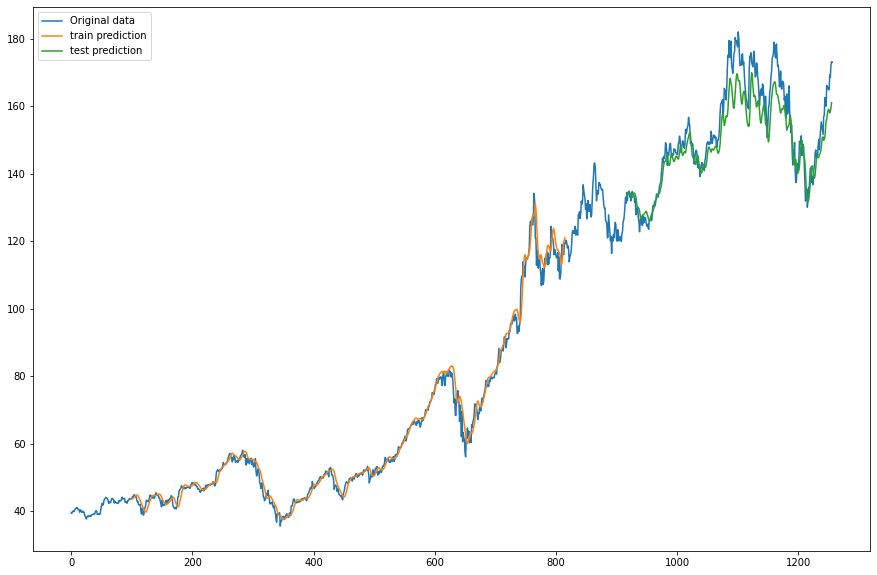

In [ ]:
### Plotting 

# shift train predictions for plotting

look_back=100

trainPredictPlot = numpy.empty_like(df1)

trainPredictPlot[:, :] = np.nan

trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting

testPredictPlot = numpy.empty_like(df1)

testPredictPlot[:, :] = numpy.nan

testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions

plt.figure(figsize=(15,10))

plt.plot(Scaler.inverse_transform(df1),label='Original data')

plt.plot(trainPredictPlot,label="train prediction")

plt.plot(testPredictPlot,label="test prediction")

plt.legend()

plt.show()